In [1]:
import numpy as np
import pandas as pd

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict
from collections import  Counter
plt.style.use('ggplot')
stop=set(stopwords.words('english'))
import re
from nltk.tokenize import word_tokenize
%matplotlib inline

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   date      4058 non-null   object
 5   target    7613 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 357.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
 4   date      1683 non-null   object
dtypes: int64(1), object(4)
memory usage: 127.6+ KB
None


In [5]:
df_train.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [6]:
df_train.head()

,id,keyword,location,text,date,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,2015-08-10 13:08:09+00:00,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,2018-03-13 08:07:14+00:00,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,2015-08-06 23:49:46+00:00,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",2015-08-04 08:05:22+00:00,1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,2015-08-08 04:32:30+00:00,1


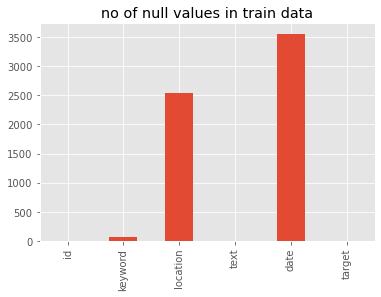

In [7]:
df_train.isna().sum().plot(kind="bar")
plt.title("no of null values in train data")
plt.show()

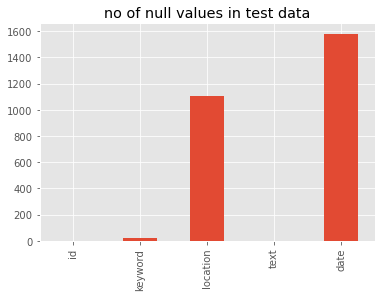

In [8]:
df_test.isna().sum().plot(kind="bar")
plt.title("no of null values in test data")
plt.show()

In [9]:
# finding percentage of 0 and 1 target

real_tweets = len(df_train[df_train["target"] == 1])
real_tweets_percentage = real_tweets/df_train.shape[0]*100
fake_tweets_percentage = 100-real_tweets_percentage

#print

print("Real tweets percentage: ",real_tweets_percentage)
print("Fake tweets percentage: ",fake_tweets_percentage)

Real tweets percentage:  42.96597924602653
Fake tweets percentage:  57.03402075397347


In [10]:
## exploring the data

In [11]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Text(0, 0.5, 'samples')

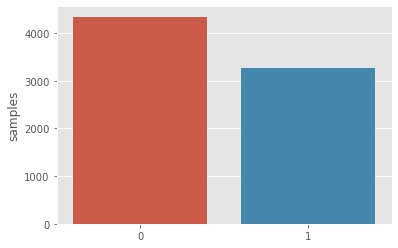

In [12]:
x=df_train.target.value_counts()
sns.barplot(x=x.index,y=x)
plt.gca().set_ylabel('samples')

In [13]:
df_train["text"].head()

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object

In [14]:
df_train["text"].tolist()[:5]

['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all',
 'Forest fire near La Ronge Sask. Canada',
 "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected",
 '13,000 people receive #wildfires evacuation orders in California ',
 'Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school ']

In [15]:
t = df_train["text"].to_list()
for i in range(5):
    print('Tweet Number '+str(i+1)+': '+t[i])

Tweet Number 1: Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
Tweet Number 2: Forest fire near La Ronge Sask. Canada
Tweet Number 3: All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
Tweet Number 4: 13,000 people receive #wildfires evacuation orders in California 
Tweet Number 5: Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school 


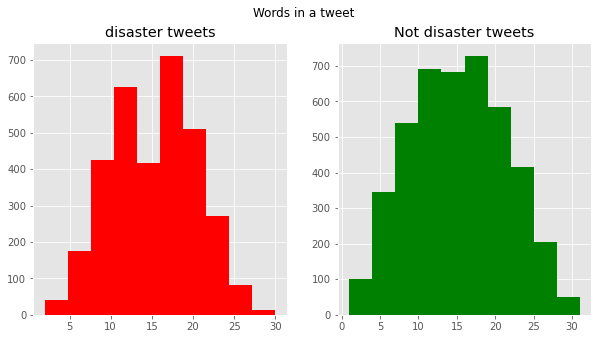

<function matplotlib.pyplot.legend(*args, **kwargs)>

In [16]:
##number of words in tweet


fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
df_train_len=df_train[df_train['target']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(df_train_len,color='red')
ax1.set_title('disaster tweets')
df_train_len=df_train[df_train['target']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(df_train_len,color='green')
ax2.set_title('Not disaster tweets')
fig.suptitle('Words in a tweet')
plt.show()
plt.legend

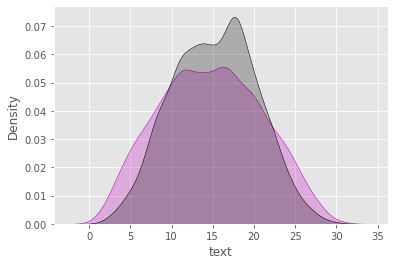

In [17]:
plot1 = sns.kdeplot(df_train[df_train['target'] == 0]['text'].str.split().map(lambda x: len(x)), shade = True, color = 'm')
plot2 = sns.kdeplot(df_train[df_train['target']== 1]['text'].str.split().map(lambda x: len(x)), shade = True, color = 'k')
plt.show()

In [18]:
#consider locations

l = df_train["location"].to_list()
print('There is '+ str(len(set(l)))+" different loction")

There is 3342 different loction


In [19]:
df_train['location'].value_counts().head(n=20)

USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Washington, DC      21
Kenya               20
Worldwide           19
Australia           18
Chicago, IL         18
California          17
Everywhere          15
New York, NY        15
California, USA     15
Florida             14
Name: location, dtype: int64

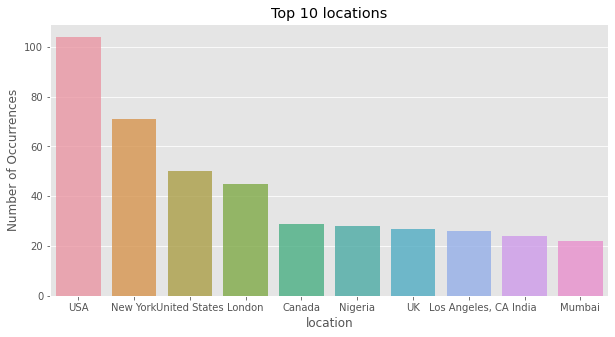

In [20]:
location_count  = df_train['location'].value_counts()
location_count = location_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(x=location_count.index, y=location_count.values, alpha=0.8)
plt.title('Top 10 locations')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('location', fontsize=12)
plt.show()

In [21]:
#consider dates

l = df_train["date"].to_list()
print('There is '+ str(len(set(l)))+" different dates")

There is 3796 different dates


In [22]:
df_train['date'].value_counts().head(n=20)

2020-08-25 10:07:15+00:00    12
2015-08-06 00:17:15+00:00    10
2020-08-01 02:00:00+00:00     7
2015-11-21 12:15:38+00:00     6
2015-11-21 03:39:03+00:00     6
2015-08-05 21:17:09+00:00     5
2015-08-06 01:55:02+00:00     4
2015-08-05 23:11:02+00:00     4
2020-08-27 22:00:23+00:00     4
2015-08-05 21:16:58+00:00     3
2015-08-05 20:55:02+00:00     3
2015-11-21 10:12:02+00:00     3
2015-08-06 01:20:44+00:00     3
2017-03-10 21:47:01+00:00     3
2015-08-06 00:38:38+00:00     3
2017-09-23 15:48:46+00:00     3
2016-03-29 19:20:25+00:00     3
2015-08-06 12:28:08+00:00     3
2020-08-25 10:01:33+00:00     3
2015-11-21 06:57:15+00:00     3
Name: date, dtype: int64

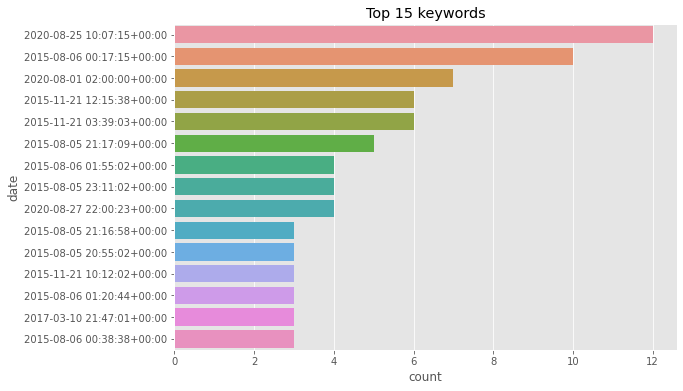

In [23]:
plt.figure(figsize=(9,6))
sns.countplot(y=df_train.date, order = df_train.date.value_counts().iloc[:15].index)
plt.title('Top 15 keywords')
plt.show()

### keywords

df_train['keyword'].value_counts().head(n=20)

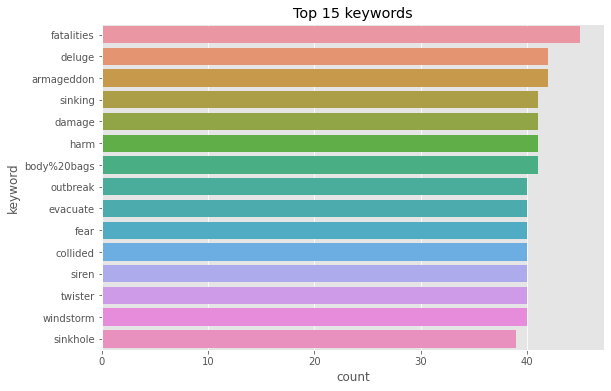

In [24]:
plt.figure(figsize=(9,6))
sns.countplot(y=df_train.keyword, order = df_train.keyword.value_counts().iloc[:15].index)
plt.title('Top 15 keywords')
plt.show()


In [25]:
#cleaning data

import string
def clean(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

# Applying the cleaning function to both test and train datasets
df_train['text'] = df_train['text'].apply(lambda x: clean(x))
df_test['text'] = df_test['text'].apply(lambda x: clean(x))


df_train['text'].head()

0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
3     people receive wildfires evacuation orders in...
4    just got sent this photo from ruby alaska as s...
Name: text, dtype: object

In [26]:
import html
def clean(text):
    
    text = html.unescape(text) 
    text = re.sub(r'<[^<>]*>', ' ', text)
    text = re.sub(r'\[([^\[\]]*)\]\([^\(\)]*\)', r'\1', text)
    text = re.sub(r'\[[^\[\]]*\]', ' ', text)
    text = re.sub(r'(?:^|\s)[&#<>{}\[\]+|\\:-]{1,}(?:\s|$)', ' ', text)
    text = re.sub(r'(?:^|\s)[\-=\+]{2,}(?:\s|$)', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'\$\w*', '', text)  
    text = re.sub(r'RT[\s]+', '', text)        
    text = re.sub(r'DT[\s]+', '', text)   
    text = re.sub(r'#', '', text)
    
    return text.strip()




In [27]:
from textacy import preprocessing
from functools import partial

# create cleaning pipeline
preproc = preprocessing.make_pipeline(
    
    
    preprocessing.normalize.hyphenated_words,
    preprocessing.normalize.unicode,
    preprocessing.remove.accents, 
    partial(preprocessing.replace.emails, repl= ""),
    partial(preprocessing.replace.phone_numbers, repl=""),
    partial(preprocessing.replace.urls, repl= ""), 
    partial(preprocessing.replace.user_handles, repl=""),
    partial(preprocessing.replace.numbers, repl=""),
    preprocessing.remove.html_tags,
    preprocessing.remove.brackets,
    partial(preprocessing.remove.punctuation, only=[ ",", ":", ";", "/", " ","(","@"]),
    
    preprocessing.replace.currency_symbols,
    
    preprocessing.replace.emojis,
    
 )

In [28]:
df_train['text_c'] = df_train['text'].apply(clean)
df_train["clean_text"] = df_train["text_c"].apply(preproc)
df_train.sample(5, random_state=42)

,id,keyword,location,text,date,target,text_c,clean_text
2644,3796,destruction,NaN,so you have a new weapon that can cause unimag...,2015-08-06 17:55:50+00:00,1,so you have a new weapon that can cause unimag...,so you have a new weapon that can cause unimag...
2227,3185,deluge,NaN,the famping things i do for gishwhes just got ...,NaN,0,the famping things i do for gishwhes just got ...,the famping things i do for gishwhes just got ...
5448,7769,police,UK,dt georgegalloway rt ûïthe col police can ca...,NaN,1,dt georgegalloway rt ûïthe col police can cat...,dt georgegalloway rt uithe col police can cat...
132,191,aftershock,NaN,aftershock back to school kick off was great i...,2015-08-06 02:48:03+00:00,0,aftershock back to school kick off was great i...,aftershock back to school kick off was great i...
6845,9810,trauma,"Montgomery County, MD",in response to trauma children of addicts deve...,2015-08-06 01:09:42+00:00,0,in response to trauma children of addicts deve...,in response to trauma children of addicts deve...


In [29]:
#test train split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_train['clean_text'],
                                                    df_train['target'],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=df_train['target'])

print('Size of Training Data ', x_train.shape[0])
print('Size of Test Data ', x_test.shape[0])


Size of Training Data  6090
Size of Test Data  1523


In [30]:
##modelling
## Classification with TFIDF and SVM

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC


In [31]:


text=df_train['text']
y=df_train['target']



In [32]:
tfidf= TfidfVectorizer()
X=tfidf.fit_transform(text)

In [33]:
X.shape

(7613, 16543)

In [34]:
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [35]:
def run_SVM (clf, x_train, x_test, y_train, y_test):
    clf.fit (x_train, y_train)
    y_pred=clf.predict (x_test)
    print()
    print('Classification Report')
    print(classification_report (y_test, y_pred))

In [36]:
from sklearn.svm import LinearSVC

In [37]:
clf= LinearSVC()
run_SVM(clf, x_train, x_test, y_train, y_test)


Classification Report
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       869
           1       0.83      0.68      0.75       654

    accuracy                           0.80      1523
   macro avg       0.81      0.79      0.79      1523
weighted avg       0.81      0.80      0.80      1523



# word embedding and classification with deep learning

In [38]:
!pip install tensorflow

In [39]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D

In [40]:
token = Tokenizer()
token.fit_on_texts (text)
vocab_size = len (token.word_index) + 1
vocab_size


16834

In [41]:
print (token.word_index)

{'the': 1, 'a': 2, 'in': 3, 'to': 4, 'of': 5, 'and': 6, 'i': 7, 'is': 8, 'for': 9, 'on': 10, 'you': 11, 'my': 12, 'with': 13, 'it': 14, 'that': 15, 'at': 16, 'by': 17, 'this': 18, 'from': 19, 'are': 20, 'be': 21, 'was': 22, 'have': 23, 'like': 24, 'as': 25, 'up': 26, 'just': 27, 'so': 28, 'me': 29, 'but': 30, 'amp': 31, 'im': 32, 'not': 33, 'your': 34, 'out': 35, 'its': 36, 'after': 37, 'will': 38, 'all': 39, 'no': 40, 'an': 41, 'fire': 42, 'has': 43, 'when': 44, 'if': 45, 'we': 46, 'get': 47, 'new': 48, 'via': 49, 'now': 50, 'more': 51, 'about': 52, 'or': 53, 'what': 54, 'people': 55, 'he': 56, 'they': 57, 'been': 58, 'one': 59, 'how': 60, 'dont': 61, 'over': 62, 'news': 63, 'who': 64, 'into': 65, 'do': 66, 'were': 67, 'us': 68, 'video': 69, 'can': 70, 'emergency': 71, 'disaster': 72, 'there': 73, 'than': 74, 'police': 75, 'her': 76, 'would': 77, 'some': 78, 'still': 79, 'his': 80, 'body': 81, 'burning': 82, 'back': 83, 'california': 84, 'crash': 85, 'suicide': 86, 'storm': 87, 'why':

In [42]:
encoded_text= token.texts_to_sequences (text)

In [43]:
print (encoded_text)

[[107, 4290, 20, 1, 834, 5, 18, 231, 123, 1629, 4291, 68, 39], [174, 42, 208, 684, 6419, 6420, 1300], [39, 1630, 1506, 4, 1999, 3, 633, 20, 118, 6421, 17, 1631, 40, 414, 237, 53, 1999, 3, 633, 1301, 20, 1022], [55, 4292, 1302, 237, 1301, 3, 84], [27, 90, 1132, 18, 321, 19, 6422, 2000, 25, 246, 19, 1302, 6423, 65, 2, 175], [2708, 442, 84, 1507, 793, 3, 614, 6424, 538, 4, 1080, 351, 42, 4293, 1302], [209, 72, 794, 271, 1133, 795, 232, 5, 1632, 3, 6425, 961, 2273, 1508], [32, 10, 213, 5, 1, 1803, 6, 7, 70, 104, 2, 42, 3, 1, 4294], [266, 41, 71, 237, 1209, 50, 3, 1, 564, 796, 1, 685], [32, 2274, 15, 1, 510, 8, 223, 4, 107, 352], [565, 55, 584, 19, 1, 272, 443, 28, 585], [797, 615, 2709, 8, 200, 2710, 3320, 634, 2, 635, 7, 189, 3, 615, 2709, 54, 152, 7, 284, 66, 54, 152, 7, 284, 66, 6426, 232], [2711, 232, 2001, 6427, 2709, 53, 586, 285, 709, 3321], [209, 3, 4295, 878, 46, 1633, 4295], [224, 4, 175, 371, 10, 3, 4296, 119, 85, 339], [616, 26, 95], [7, 108, 4297], [296, 8, 1634], [12, 119, 8,

In [44]:
max_length = 40
X = pad_sequences (encoded_text, maxlen=max_length, padding='post')

In [45]:
print(X)

[[ 107 4290   20 ...    0    0    0]
 [ 174   42  208 ...    0    0    0]
 [  39 1630 1506 ...    0    0    0]
 ...
 [ 210    5  558 ...    0    0    0]
 [  75 1064   37 ...    0    0    0]
 [   1  193   51 ...    0    0    0]]


In [46]:
X.shape

(7613, 40)

# BERT MODEL BUILDING AND TRAINING

In [47]:
!pip install ktrain

In [48]:
from ktrain import text
import ktrain

In [49]:
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_df(train_df=df_train, text_column='text', label_columns=['target'], maxlen=40, preprocess_mode='bert')

['not_target', 'target']
      not_target  target
6729         0.0     1.0
1788         0.0     1.0
739          1.0     0.0
4787         1.0     0.0
1004         1.0     0.0
['not_target', 'target']
      not_target  target
2596         0.0     1.0
6689         1.0     0.0
7548         1.0     0.0
854          1.0     0.0
2155         0.0     1.0
preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [50]:
model = text.text_classifier (name='bert', train_data=(x_train, y_train), preproc=preproc)

Is Multi-Label? False
maxlen is 40


C:\ProgramData\Anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


done.


In [51]:
learner = ktrain.get_learner(model=model, train_data=(x_train, y_train), val_data=(x_test, y_test), batch_size=64)

In [52]:
learner.fit_onecycle(lr= 2e-5, epochs=3)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/3


ResourceExhaustedError: Graph execution error:

Detected at node 'model_1/Encoder-9-FeedForward-Dropout/dropout/GreaterEqual' defined at (most recent call last):
    File "C:\ProgramData\Anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\ProgramData\Anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\ProgramData\Anaconda3\lib\asyncio\base_events.py", line 596, in run_forever
      self._run_once()
    File "C:\ProgramData\Anaconda3\lib\asyncio\base_events.py", line 1890, in _run_once
      handle._run()
    File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 457, in dispatch_queue
      await self.process_one()
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 446, in process_one
      await dispatch(*args)
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 353, in dispatch_shell
      await result
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
      reply_content = await reply_content
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 353, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2901, in run_cell
      result = self._run_cell(
    File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2947, in _run_cell
      return runner(coro)
    File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3172, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3364, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Dell\AppData\Local\Temp/ipykernel_14088/2807142035.py", line 1, in <module>
      learner.fit_onecycle(lr= 2e-5, epochs=3)
    File "C:\ProgramData\Anaconda3\lib\site-packages\ktrain\core.py", line 1037, in fit_onecycle
      hist = self.fit(
    File "C:\ProgramData\Anaconda3\lib\site-packages\ktrain\core.py", line 1395, in fit
      hist = self.model.fit(
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1023, in train_step
      y_pred = self(x, training=True)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 561, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py", line 511, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py", line 668, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\layers\regularization\dropout.py", line 120, in call
      output = control_flow_util.smart_cond(
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\utils\control_flow_util.py", line 108, in smart_cond
      return tf.__internal__.smart_cond.smart_cond(
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\layers\regularization\dropout.py", line 116, in dropped_inputs
      return self._random_generator.dropout(
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\backend.py", line 2162, in dropout
      return tf.nn.dropout(
Node: 'model_1/Encoder-9-FeedForward-Dropout/dropout/GreaterEqual'
OOM when allocating tensor with shape[64,40,768] and type bool on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[{{node model_1/Encoder-9-FeedForward-Dropout/dropout/GreaterEqual}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_34925]